## Plotting preferences

In [13]:
# Importing things 
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import matplotlib.ticker as mticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import ScalarFormatter

import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

from scipy.ndimage import gaussian_filter

from matplotlib.gridspec import GridSpec

In [14]:
# Font sizes
axis_label_font = 30
axis_numbers_font = 25
title_font = 50
legend_font = 25

detection_colours = sns.color_palette("hls", 4)
dark_colours = sns.color_palette("viridis", 8)
my_colours = sns.color_palette("husl", 8)

cmap_reds = ListedColormap(plt.cm.get_cmap('Reds', 10)(np.arange(10)))
cmap_greens = ListedColormap(plt.cm.get_cmap('Greens', 10)(np.arange(10)))
cmap_purples = ListedColormap(plt.cm.get_cmap('Purples', 10)(np.arange(10)))

alpha = 0.7

path = '/Users/audreyburggraf/Desktop/THESIS/Figures/'

## Data 

In [15]:
# Importing data file 
df = pd.read_csv('/Users/audreyburggraf/Desktop/THESIS/Data Files/bigrun_10000_after_changes.csv')

## Stellar Mass $M_*$

In [16]:
print('Min: ', df['Stellar Mass'].min())
print('Max: ', df['Stellar Mass'].max())

Min:  0.0735588461744077
Max:  0.7436028289014885


In [17]:
MstarBin = np.linspace(0.07, 0.8, 20) 
num_MstarBin = len(MstarBin) - 1
MstarBin_midpoints = (MstarBin[:-1] + MstarBin[1:]) / 2

In [18]:
num_planets_per_MstarBin       = np.zeros(num_MstarBin)
num_detected_MstarBin         = np.zeros(num_MstarBin)
sensitivity_MstarBin          = np.zeros(num_MstarBin)
detection_uncertainty_MstarBin = np.zeros(num_MstarBin)

# Iterate through each Period bin
for i, M in enumerate(MstarBin[:-1]):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (df['Stellar Mass'] >= MstarBin[i]) 

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_MstarBin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_MstarBin[i] = detected.sum()

    sensitivity_MstarBin[i] = num_detected_MstarBin[i]/ num_planets_per_MstarBin[i]
    detection_uncertainty_MstarBin[i] = np.sqrt(num_detected_MstarBin[i])/ num_planets_per_MstarBin[i]
    
    print(f"Period range = {MstarBin[i]:.3f}, Sensitivity = {sensitivity_MstarBin[i]:.3f}")

Period range = 0.070, Sensitivity = 0.154
Period range = 0.108, Sensitivity = 0.169
Period range = 0.147, Sensitivity = 0.178
Period range = 0.185, Sensitivity = 0.182
Period range = 0.224, Sensitivity = 0.185
Period range = 0.262, Sensitivity = 0.186
Period range = 0.301, Sensitivity = 0.191
Period range = 0.339, Sensitivity = 0.192
Period range = 0.377, Sensitivity = 0.195
Period range = 0.416, Sensitivity = 0.201
Period range = 0.454, Sensitivity = 0.201
Period range = 0.493, Sensitivity = 0.206
Period range = 0.531, Sensitivity = 0.206
Period range = 0.569, Sensitivity = 0.195
Period range = 0.608, Sensitivity = 0.196
Period range = 0.646, Sensitivity = 0.199
Period range = 0.685, Sensitivity = 0.204
Period range = 0.723, Sensitivity = 0.258
Period range = 0.762, Sensitivity = nan


/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_94752/808180361.py:21: RuntimeWarning: invalid value encountered in double_scalars
  sensitivity_MstarBin[i] = num_detected_MstarBin[i]/ num_planets_per_MstarBin[i]
/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_94752/808180361.py:22: RuntimeWarning: invalid value encountered in double_scalars
  detection_uncertainty_MstarBin[i] = np.sqrt(num_detected_MstarBin[i])/ num_planets_per_MstarBin[i]


In [19]:
num_planets_per_MstarBin       = np.zeros(num_MstarBin)
num_detected_MstarBin         = np.zeros(num_MstarBin)
sensitivity_MstarBin          = np.zeros(num_MstarBin)
detection_uncertainty_MstarBin = np.zeros(num_MstarBin)

# Iterate through each Period bin
for i, M in enumerate(MstarBin[:-1]):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (df['Stellar Mass'] >= MstarBin[i]) & (df['Stellar Mass'] < MstarBin[i+1])

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_MstarBin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_MstarBin[i] = detected.sum()

    sensitivity_MstarBin[i] = num_detected_MstarBin[i]/ num_planets_per_MstarBin[i]
    detection_uncertainty_MstarBin[i] = np.sqrt(num_detected_MstarBin[i])/ num_planets_per_MstarBin[i]
    
    print(f"Period range = {MstarBin[i]:.3f} - {MstarBin[i+1]:.3f}, Sensitivity = {sensitivity_MstarBin[i]:.3f}")

Period range = 0.070 - 0.108, Sensitivity = 0.051
Period range = 0.108 - 0.147, Sensitivity = 0.107
Period range = 0.147 - 0.185, Sensitivity = 0.151
Period range = 0.185 - 0.224, Sensitivity = 0.162
Period range = 0.224 - 0.262, Sensitivity = 0.179
Period range = 0.262 - 0.301, Sensitivity = 0.158
Period range = 0.301 - 0.339, Sensitivity = 0.182
Period range = 0.339 - 0.377, Sensitivity = 0.172
Period range = 0.377 - 0.416, Sensitivity = 0.165
Period range = 0.416 - 0.454, Sensitivity = 0.197
Period range = 0.454 - 0.493, Sensitivity = 0.177
Period range = 0.493 - 0.531, Sensitivity = 0.203
Period range = 0.531 - 0.569, Sensitivity = 0.255
Period range = 0.569 - 0.608, Sensitivity = 0.192
Period range = 0.608 - 0.646, Sensitivity = 0.191
Period range = 0.646 - 0.685, Sensitivity = 0.191
Period range = 0.685 - 0.723, Sensitivity = 0.182
Period range = 0.723 - 0.762, Sensitivity = 0.258
Period range = 0.762 - 0.800, Sensitivity = nan


/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_94752/4133633892.py:21: RuntimeWarning: invalid value encountered in double_scalars
  sensitivity_MstarBin[i] = num_detected_MstarBin[i]/ num_planets_per_MstarBin[i]
/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_94752/4133633892.py:22: RuntimeWarning: invalid value encountered in double_scalars
  detection_uncertainty_MstarBin[i] = np.sqrt(num_detected_MstarBin[i])/ num_planets_per_MstarBin[i]


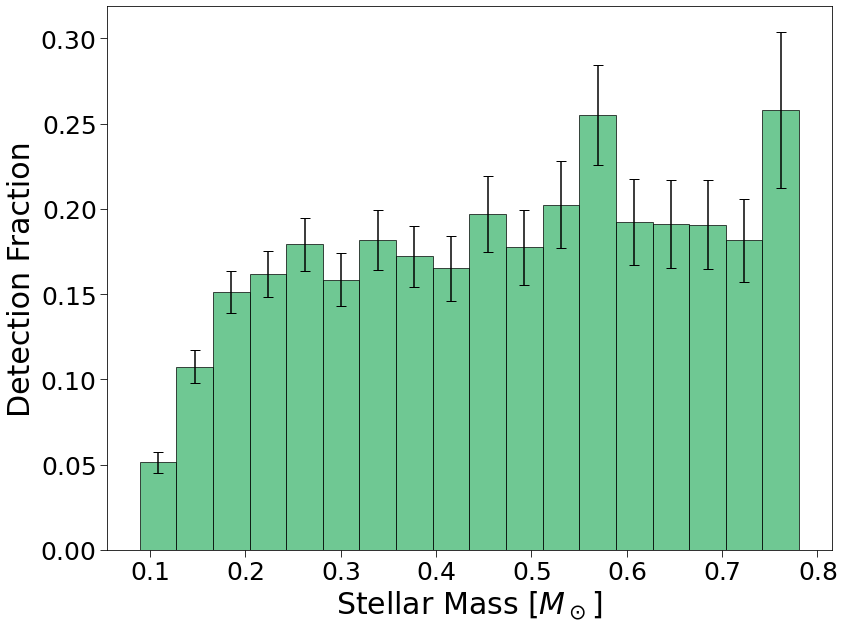

In [39]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(13, 10))

# Plot the sensitivity values as a bar graph

ax.bar(MstarBin_midpoints,
       sensitivity_MstarBin,
       yerr=detection_uncertainty_MstarBin,
       capsize=5,
       width = np.diff(MstarBin),
       color=my_colours[3], 
       alpha=alpha, 
       edgecolor='black',
       align="edge",
       label='Sensitivity in Each P Bin')


# Axes labels 
ax.set_xlabel('Stellar Mass [$M_\odot$]', fontsize=axis_label_font)
ax.set_ylabel('Detection Fraction', fontsize=axis_label_font)

# add legned
# ax.legend(fontsize=legend_font)



# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


plt.savefig(path + 'Stellar_Mass_det_frac_full_sample.pdf', dpi=300)

# $S/N$

In [21]:
SNBin = np.logspace(np.log10(df['S/N'].min()), np.log10(df['S/N'].max()), 20) 
num_SNBin = len(SNBin) - 1
SNBin_midpoints = (SNBin[:-1] + SNBin[1:]) / 2

In [22]:
SNBin = np.logspace(np.log10(df['S/N'].min()), np.log10(df['S/N'].max()), 20) 
num_SNBin = len(SNBin) - 1
SNBin_midpoints = (SNBin[:-1] + SNBin[1:]) / 2

In [23]:
num_planets_per_SNBin       = np.zeros(num_SNBin)
num_detected_SNBin         = np.zeros(num_SNBin)
sensitivity_SNBin          = np.zeros(num_SNBin)
detection_uncertainty_SNBin = np.zeros(num_SNBin)

# Iterate through each Period bin
for i, M in enumerate(SNBin[:-1]):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (df['S/N'] >= SNBin[i]) & (df['S/N'] < SNBin[i+1])

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_SNBin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_SNBin[i] = detected.sum()

    sensitivity_SNBin[i] = num_detected_SNBin[i]/ num_planets_per_SNBin[i]
    detection_uncertainty_SNBin[i] = np.sqrt(num_detected_SNBin[i])/ num_planets_per_SNBin[i]
    
    print(f"SN range = {SNBin[i]:.3f} - {SNBin[i+1]:.3f},  num in each bin =  {num_planets_per_SNBin[i]:.3f}, Sensitivity = {sensitivity_SNBin[i]:.3f} +/- {detection_uncertainty_SNBin[i]:.3f}")

SN range = 0.014 - 0.023,  num in each bin =  22.000, Sensitivity = 0.000 +/- 0.000
SN range = 0.023 - 0.038,  num in each bin =  49.000, Sensitivity = 0.000 +/- 0.000
SN range = 0.038 - 0.062,  num in each bin =  181.000, Sensitivity = 0.000 +/- 0.000
SN range = 0.062 - 0.102,  num in each bin =  358.000, Sensitivity = 0.000 +/- 0.000
SN range = 0.102 - 0.167,  num in each bin =  634.000, Sensitivity = 0.000 +/- 0.000
SN range = 0.167 - 0.272,  num in each bin =  945.000, Sensitivity = 0.003 +/- 0.002
SN range = 0.272 - 0.445,  num in each bin =  1147.000, Sensitivity = 0.005 +/- 0.002
SN range = 0.445 - 0.727,  num in each bin =  1220.000, Sensitivity = 0.033 +/- 0.005
SN range = 0.727 - 1.188,  num in each bin =  1233.000, Sensitivity = 0.069 +/- 0.007
SN range = 1.188 - 1.942,  num in each bin =  1211.000, Sensitivity = 0.162 +/- 0.012
SN range = 1.942 - 3.173,  num in each bin =  1021.000, Sensitivity = 0.294 +/- 0.017
SN range = 3.173 - 5.184,  num in each bin =  780.000, Sensiti

Text(0.01, 0.93, '(c)')

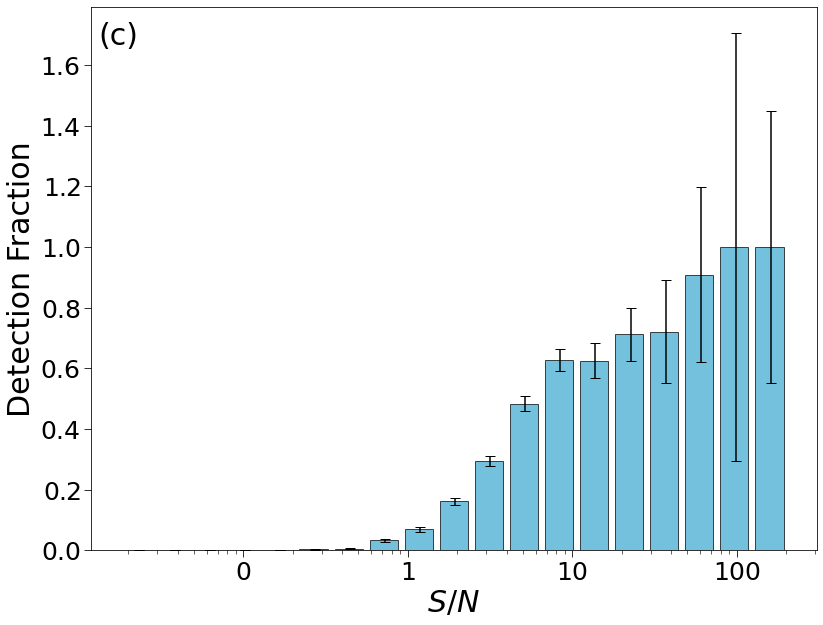

In [24]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(13, 10))

# Plot the sensitivity values as a bar graph

ax.bar(SNBin_midpoints,
       sensitivity_SNBin,
       yerr=detection_uncertainty_SNBin,
       capsize=5,
       width=np.diff(SNBin),
       color=my_colours[5], 
       alpha=alpha, 
       edgecolor='black',
       align="edge",
       label='Sensitivity in Each P Bin')


# Axes labels 
ax.set_xlabel('$S/N$', fontsize=axis_label_font)
ax.set_ylabel('Detection Fraction', fontsize=axis_label_font)

# add legned
# ax.legend(fontsize=legend_font)

ax.set_xscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.text(0.01, 0.93, '(c)', transform=ax.transAxes, fontsize=axis_label_font)

# Distance

In [34]:
# DBin = np.linspace(0, 100, 20) 

# DBin = np.logspace(np.log10(df['Distance'].min()), np.log10(df['Distance'].max()), 50) 

DBin = np.linspace(df['Distance'].min(), df['Distance'].max(), 50) 

num_DBin = len(DBin) - 1
DBin_midpoints = (DBin[:-1] + DBin[1:]) / 2

In [35]:
num_planets_per_DBin       = np.zeros(num_DBin)
num_detected_DBin         = np.zeros(num_DBin)
sensitivity_DBin          = np.zeros(num_DBin)
detection_uncertainty_DBin = np.zeros(num_DBin)

# Iterate through each Period bin
for i, M in enumerate(DBin[:-1]):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (df['Distance'] >= DBin[i]) & (df['Distance'] < DBin[i+1])

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_DBin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_DBin[i] = detected.sum()

    sensitivity_DBin[i] = num_detected_DBin[i]/ num_planets_per_DBin[i]
    detection_uncertainty_DBin[i] = np.sqrt(num_detected_DBin[i])/ num_planets_per_DBin[i]
    
    print(f"Period range = {DBin[i]:.5f} - {DBin[i+1]:.3f}, Sensitivity = {sensitivity_DBin[i]:.3f}")

Period range = 3.56259 - 5.531, Sensitivity = 1.000
Period range = 5.53061 - 7.499, Sensitivity = 0.500
Period range = 7.49864 - 9.467, Sensitivity = 1.000
Period range = 9.46666 - 11.435, Sensitivity = 0.429
Period range = 11.43469 - 13.403, Sensitivity = 0.111
Period range = 13.40271 - 15.371, Sensitivity = 0.643
Period range = 15.37074 - 17.339, Sensitivity = 0.500
Period range = 17.33876 - 19.307, Sensitivity = 0.333
Period range = 19.30679 - 21.275, Sensitivity = 0.286
Period range = 21.27481 - 23.243, Sensitivity = 0.485
Period range = 23.24284 - 25.211, Sensitivity = 0.367
Period range = 25.21086 - 27.179, Sensitivity = 0.357
Period range = 27.17889 - 29.147, Sensitivity = 0.256
Period range = 29.14691 - 31.115, Sensitivity = 0.467
Period range = 31.11493 - 33.083, Sensitivity = 0.265
Period range = 33.08296 - 35.051, Sensitivity = 0.382
Period range = 35.05098 - 37.019, Sensitivity = 0.210
Period range = 37.01901 - 38.987, Sensitivity = 0.226
Period range = 38.98703 - 40.955, S

No handles with labels found to put in legend.
No handles with labels found to put in legend.


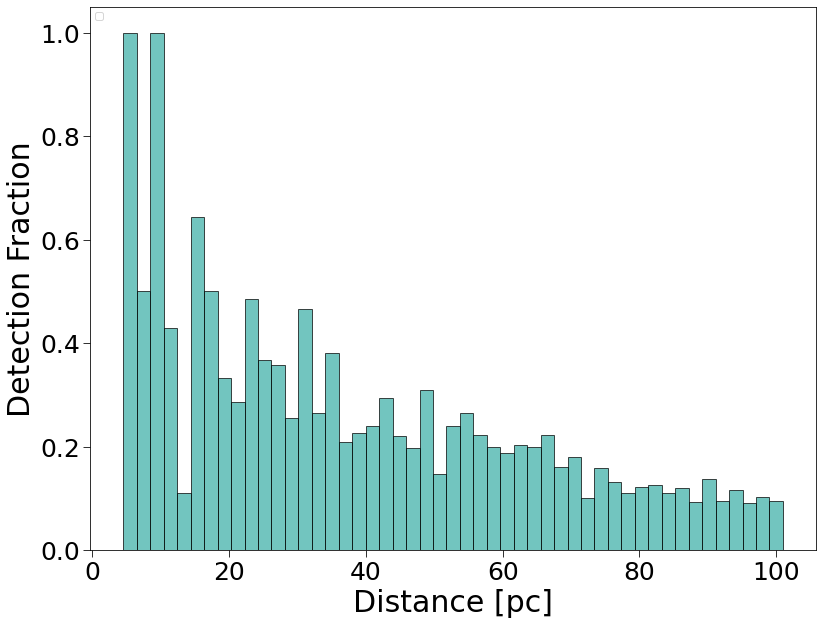

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(13, 10))

# Plot the first set of bars with the primary y-axis (left)
ax1.bar(DBin_midpoints,
       sensitivity_DBin,
       width=np.diff(DBin),
       color=my_colours[4], 
       alpha=alpha, 
       edgecolor='black',
       align="edge")


# Create a secondary y-axis for the second set of bars (right)


ax2.set_ylabel('Data 2', fontsize=14)
ax2.tick_params(axis='y')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



# Axes labels 
ax1.set_xlabel('Distance [pc]', fontsize=axis_label_font)

ax1.set_ylabel('Detection Fraction', fontsize=axis_label_font)
ax2.set_ylabel('Detection Count', fontsize=axis_label_font)


# Set x-axis tick parameters
ax1.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax1.tick_params(which='minor', length=4)

ax2.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax2.tick_params(which='minor', length=4)

